# Praca domowa nr 6
#### Wstęp do Eksploracji Danych, IV semestr, Wydział MiNI PW
#### Marek Mączka

## EDA zbioru danych World Happiness Report updated_2024

Dane pochodzą ze strony:

https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated

Przedstawiają one wyniki badań World Happiness Report z lat 2008-2023, dotyczące stanu szczęścia na świecie.

Kolumnami w niej są:
- `Country name`: Nazwa kraju.
- `year`: rok, w którym było przeprowadzane badanie
- `Life Ladder`: Wynik szczęścia dla każdego kraju, oparty na odpowiedziach na "Cantril Ladder question", w którym prosi się respondentów, aby pomyśleli o drabinie, gdzie najlepsze możliwe życie dla nich to 10, a najgorsze możliwe życie to 0.
- `Log GDP per capita`: Logarytm naturalny PKB na mieszkańca kraju, skorygowany o parytet siły nabywczej (PSN) w celu uwzględnienia różnic w kosztach utrzymania między krajami.
- `Social support`: Średnia krajowa odpowiedzi binarnych (0 lub 1 oznaczających Nie/Tak) na pytanie o posiadanie krewnych lub przyjaciół, na których można liczyć w trudnych chwilach.
- `Healthy life expectancy at birth`: Średnia liczba lat, jaką noworodek przeżyłby w dobrym zdrowiu, w oparciu o wskaźniki umieralności i oczekiwaną długość życia w różnym wieku.
- `Freedom to make life choices`: Średnia krajowa odpowiedzi na pytanie o zadowolenie z wolności wyboru, co zrobić ze swoim życiem.
- `Generosity`: Reszta z regresji średniej krajowej odpowiedzi na pytanie o przekazywanie pieniędzy na cele charytatywne na PKB na mieszkańca.
- `Perceptions of corruption`: Średnia krajowa odpowiedzi na pytania dotyczące postrzeganego zakresu korupcji w rządzie i przedsiębiorstwach.
- `Positive affect`: Średnia krajowa odpowiedzi na pytania dotyczące pozytywnych emocji doświadczonych wczoraj.
- `Negative affect`: Średnia krajowa odpowiedzi na pytania dotyczące negatywnych emocji doświadczonych wczoraj.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("World-happiness-report-updated_2024.csv", encoding = 'unicode_escape')

# Opis zbioru danych

In [3]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [4]:
df.shape

(2363, 11)

Zbiór danych ma 2363 wierszy oraz 11 kolumn.

Typy zmiennych w nim występujące:

In [5]:
df.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

# Analiza zmiennych

In [6]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


# Analiza zmiennych w zależności od przynależności do grupy

In [7]:
df_grouped = df.drop("year", axis = 1).groupby("Country name").mean().sort_values(by="Social support",ascending = True).reset_index()
print(f"Rozmiar pogrupowanej tabeli (wiersze, kolumny):    ", df_grouped.shape)
df_grouped.head()

Rozmiar pogrupowanej tabeli (wiersze, kolumny):     (165, 10)


,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Central African Republic,3.515000,6.894800,0.402400,43.374000,0.680400,0.026600,0.84200,0.540000,0.391400
1,Burundi,3.548200,6.682200,0.417800,52.008000,0.450800,-0.038400,0.73240,0.570400,0.244200
2,Benin,4.113667,7.991467,0.461733,54.569333,0.741333,-0.057333,0.74540,0.581867,0.357267
3,Afghanistan,3.219933,7.585692,0.476733,52.711667,0.480533,0.056154,0.83580,0.421800,0.370733
4,Togo,3.719667,7.550583,0.486083,54.721667,0.632500,-0.043333,0.78275,0.565167,0.414417


In [8]:
df_to_plot = df_grouped.loc[0:10, ["Country name", "Social support"]].sort_values(by="Social support",ascending = False).reset_index(drop = True)
df_to_plot

,Country name,Social support
0,Morocco,0.601583
1,Somalia,0.601333
2,Bangladesh,0.580278
3,Pakistan,0.570722
4,Malawi,0.556333
5,South Sudan,0.554750
6,Togo,0.486083
7,Afghanistan,0.476733
8,Benin,0.461733
9,Burundi,0.417800


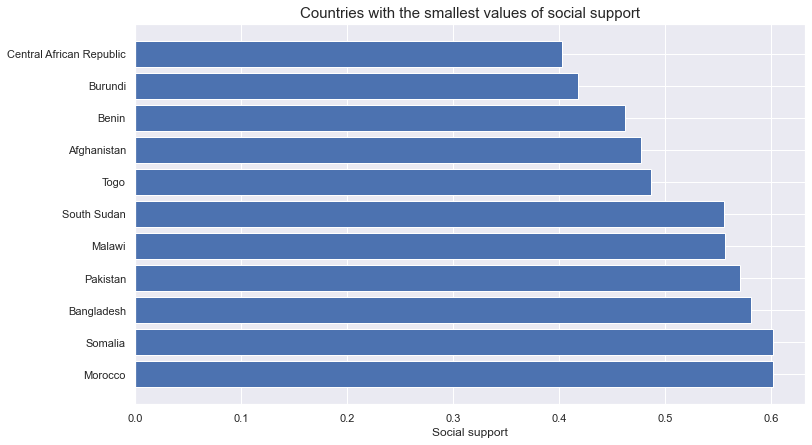

In [9]:
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
plt.barh(df_to_plot["Country name"], df_to_plot["Social support"])
plt.title("Countries with the smallest values of social support", fontsize = 15)
plt.xlabel("Social support")
plt.show()

Możemy zauważyć, że w 5 krajach na wszystkich 165, wskaźnik "Social support" informujący o procencie osób, posiadających bliskich, na których mogą polegać, jest mniejszy niz 50%.

Zbadajmy teraz jak wyglądają podstawowe statystyki pozycyjne dla kolumny "Freedom to make life choices" w podziale na kraje.

In [10]:
df.groupby("Country name")[["Freedom to make life choices"]].agg(["std", "min","mean", "median", "max"])

Freedom to make life choices                                
                                      std    min      mean  median    max
Country name                                                             
Afghanistan                      0.130646  0.228  0.480533  0.4960  0.718
Albania                          0.121434  0.487  0.694937  0.7325  0.872
Algeria                          0.078863  0.385  0.520778  0.5580  0.593
Angola                           0.091398  0.375  0.456250  0.4330  0.584
Argentina                        0.072115  0.637  0.777722  0.8165  0.881
...                                   ...    ...       ...     ...    ...
Venezuela                        0.107095  0.458  0.673278  0.6595  0.838
Vietnam                          0.048112  0.818  0.898667  0.8970  0.975
Yemen                            0.052434  0.533  0.618500  0.6240  0.706
Zambia                           0.063237  0.663  0.774765  0.7880  0.889
Zimbabwe                         0.127276  0.344  0.604111  0.6425  0.763

[165 rows x 5 columns]

# Rozkład zmiennych

In [11]:
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")

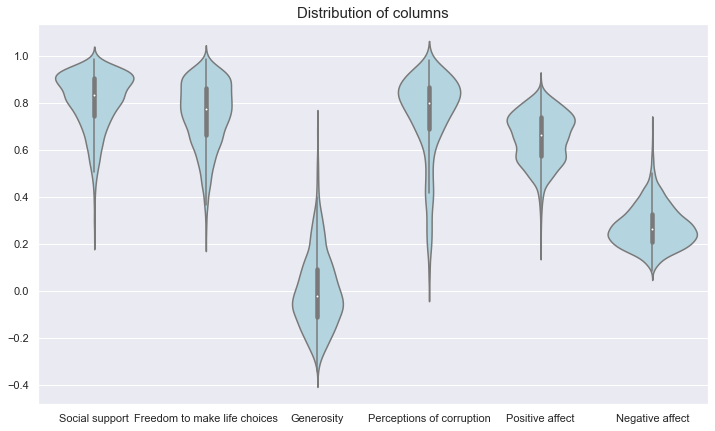

In [12]:
sns.violinplot(data=df.drop(["year", "Healthy life expectancy at birth", "Life Ladder", "Log GDP per capita"], axis = 1), color='#add8e6')
plt.title("Distribution of columns",fontsize=15)
plt.show()

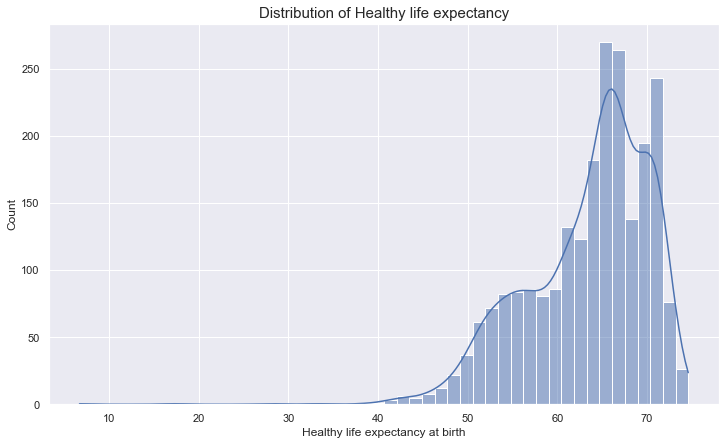

In [13]:
sns.histplot(data=df["Healthy life expectancy at birth"], kde=True)
plt.title("Distribution of Healthy life expectancy",fontsize=15)
plt.show()

# Zależności w zbiorze danych

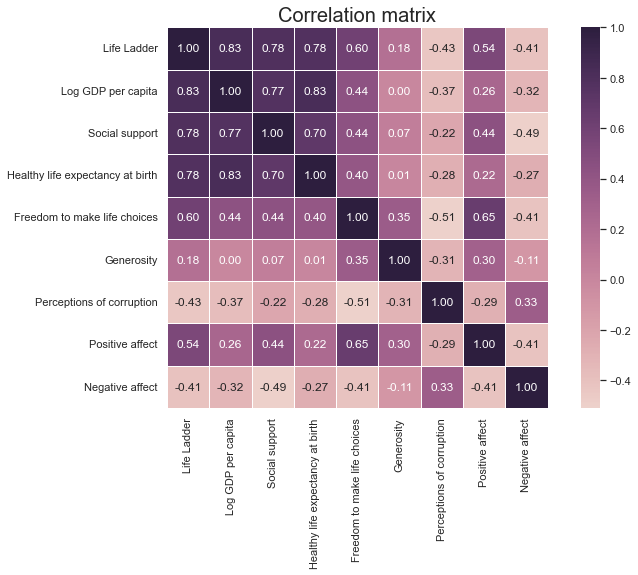

In [14]:
plt.figure()
sns.heatmap(df_grouped.corr(), annot = True,
            cmap=sns.cubehelix_palette(as_cmap = True), 
            linewidths=0.9,
            fmt='.2f',
            square = True)
plt.title('Correlation matrix', fontsize = 20)
plt.show()

Przeważnie wraz ze wzrostem PKB per capita rośnie wskaźnik Life Ladder. Możemy to zauważyć również na wykresie poniżej. 

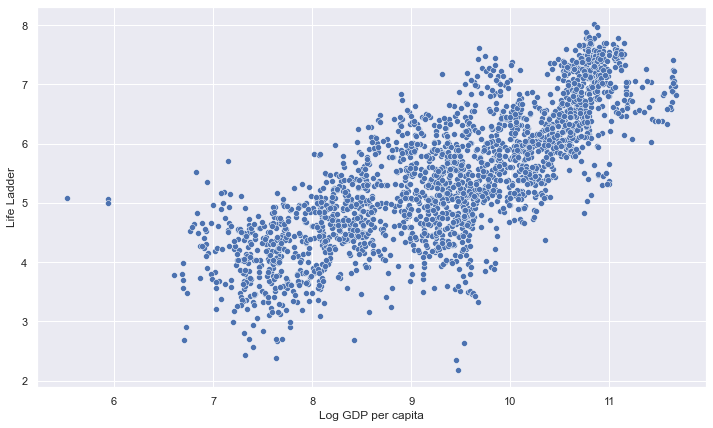

In [15]:
sns.scatterplot(data=df, x='Log GDP per capita', y="Life Ladder")
plt.show()

Możemy z kolei zauważyć, iż faktycznie PKB per capita nie koreluje w żadną ze stron z hojnością obywateli.

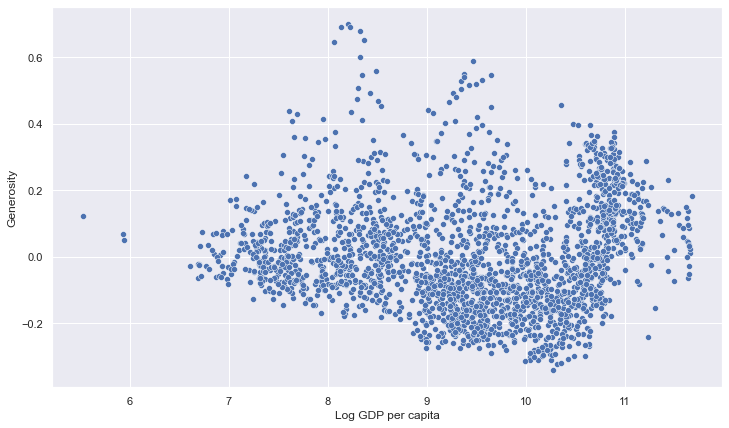

In [16]:
sns.scatterplot(data=df, x='Log GDP per capita', y="Generosity")
plt.show()